# Web Scraping
## Análise das críticas do filme Joker

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup as soup
from urllib.request import urlopen as uReq
import csv

In [2]:
rotten_urls = ["https://www.rottentomatoes.com/m/joker_2019/reviews?type=&sort="]*30

In [3]:
# Criando lista de urls com parametros do rotten tomatos
page = 1
while (page<=30):
    url_pos = page-1
    rotten_urls[url_pos] = rotten_urls[url_pos] + '&page=' + str(page)
    page = page + 1

In [4]:
rotten_urls

['https://www.rottentomatoes.com/m/joker_2019/reviews?type=&sort=&page=1',
 'https://www.rottentomatoes.com/m/joker_2019/reviews?type=&sort=&page=2',
 'https://www.rottentomatoes.com/m/joker_2019/reviews?type=&sort=&page=3',
 'https://www.rottentomatoes.com/m/joker_2019/reviews?type=&sort=&page=4',
 'https://www.rottentomatoes.com/m/joker_2019/reviews?type=&sort=&page=5',
 'https://www.rottentomatoes.com/m/joker_2019/reviews?type=&sort=&page=6',
 'https://www.rottentomatoes.com/m/joker_2019/reviews?type=&sort=&page=7',
 'https://www.rottentomatoes.com/m/joker_2019/reviews?type=&sort=&page=8',
 'https://www.rottentomatoes.com/m/joker_2019/reviews?type=&sort=&page=9',
 'https://www.rottentomatoes.com/m/joker_2019/reviews?type=&sort=&page=10',
 'https://www.rottentomatoes.com/m/joker_2019/reviews?type=&sort=&page=11',
 'https://www.rottentomatoes.com/m/joker_2019/reviews?type=&sort=&page=12',
 'https://www.rottentomatoes.com/m/joker_2019/reviews?type=&sort=&page=13',
 'https://www.rottent

In [5]:
# Pegando dados das urls
reviews=[]
for url in rotten_urls:
    uClient = uReq(url)
    page_html = uClient.read() # retorna todo html da página
    uClient.close() # fecha a conecção http
    page_soup = soup(page_html, "html.parser") # (parser) identifica o padrão html e separa
    reviews = reviews + [reviews.text for reviews in page_soup.find_all("div", {"class": "the_review"})] # Joga todo conteúdo da class the_review na lista

In [6]:
len(reviews)

585

In [7]:
reviews[:2]

["\r\n                    Ultimately, Joker is neither deserving of the controversy it's stirred up nor some of the praise it's received. Phoenix's performance is the highlight of what is ultimately a relatively tame film.\r\n                ",
 '\r\n                    An instant classic that sees Joaquin Phoenix translate a discombobulating sensation from the screen to your senses, while director Todd Phillips creates a melancholic psychodrama...\r\n                ']

In [8]:
# Escrever arquivo csv com as reviews
with open('rotten_reviews.csv', 'w') as my_file:
    wr = csv.writer(my_file, quoting=csv.QUOTE_ALL)
    wr.writerow(reviews)

## Rodar o código acima somente uma vez

In [9]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

# Natural Language Toolkit
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

from wordcloud import WordCloud, ImageColorGenerator
import numpy as np
from PIL import Image

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/hildebrando/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /home/hildebrando/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /home/hildebrando/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [10]:
with open('rotten_reviews.csv', 'r') as f:
    reader = csv.reader(f)
    reviews = list(reader)[0]

In [11]:
len(reviews)

585

In [12]:
# A tokenização separa em tokens e armazena numa lista
# stop_words são palavras que não forncecem informações relevantes
stop_words = set(stopwords.words('english'))
word_tokens=[]
for review in reviews:
    word_tokens = word_tokens + word_tokenize(review)

# Remove stop_words do tokens
filtered_word_reviews = [w for w in word_tokens if not w in stop_words]

In [13]:
print(word_tokens[:10])
print(filtered_word_reviews[:10])

['Ultimately', ',', 'Joker', 'is', 'neither', 'deserving', 'of', 'the', 'controversy', 'it']
['Ultimately', ',', 'Joker', 'neither', 'deserving', 'controversy', "'s", 'stirred', 'praise', "'s"]


In [14]:
len(filtered_word_reviews)

10878

In [15]:
def drawWordCloud(words, filename):
    text = ''
    for w in words:
        text = text + ' ' + w
        
    mask = np.array(Image.open('joker_mask.jpeg'))
    image_colors = ImageColorGenerator(mask) # Gera um vetor com as cores da imagem
    
    wordcloud = WordCloud(background_color="white", max_words=1000, mask=mask).generate(text)
    
    fig, axes = plt.subplots(1, 2, figsize=(16, 20))
    axes[0].imshow(mask, interpolation="bilinear")
    axes[1].imshow(wordcloud.recolor(color_func=image_colors, random_state=3), interpolation="bilinear")
    
    for ax in axes:
        ax.set_axis_off() # Remove a borda do gráfico
    plt.savefig(filename+".png", format="png", dpi=200)
    plt.show()

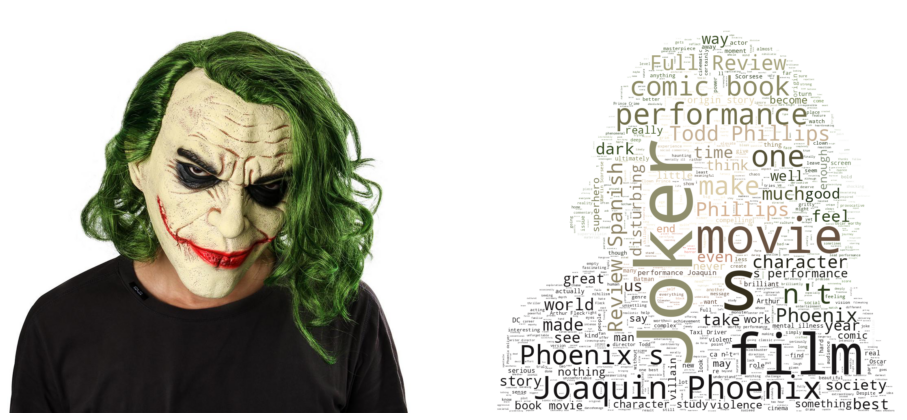

In [16]:
drawWordCloud(filtered_word_reviews, "wc_joker")

## Refazendo o gráfico, utilizando apenas adjetivos
+ Utilizando recurso do nltk "Part-Of-Speech(POS) Tagging"

In [17]:
# JJ é como os adjetivos estão categorizados no nltk.pos_tag
adjs = [word for (word, pos) in nltk.pos_tag(filtered_word_reviews) if(pos[:2] == 'JJ')]
print(adjs[:10])

['stirred', 'tame', 'instant', 'classic', 'melancholic', 'male', 'societal', 'hallmarks', 'mainstream', 'little']


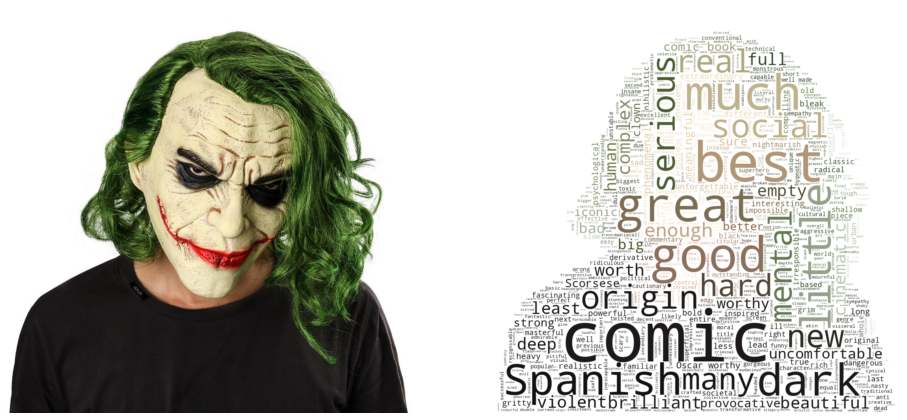

In [18]:
drawWordCloud(adjs, "wc_joker_adjs")

## Traduzindo palavras do gráfico do coringa
+ Utilizando o Google Translator - googletrans

In [19]:
from google_trans_new import google_translator

In [20]:
# Pacote não ofocal da Google
translator = google_translator()
translations = translator.translate(adjs[:100], lang_tgt='pt') # Pegando somente as 100 primeiras palavras para axecutar mais rápido

# Tive que transformar em string e limpar vários caracteres estranhos
import string
for c in string.punctuation:
    translations = translations.replace(c, '')
# Transformando em uma lista novamente e excluindo espaços vazios
translations = translations.strip().split()
    
adjs_pt = []
for translation in translations:
    adjs_pt.append(translation)

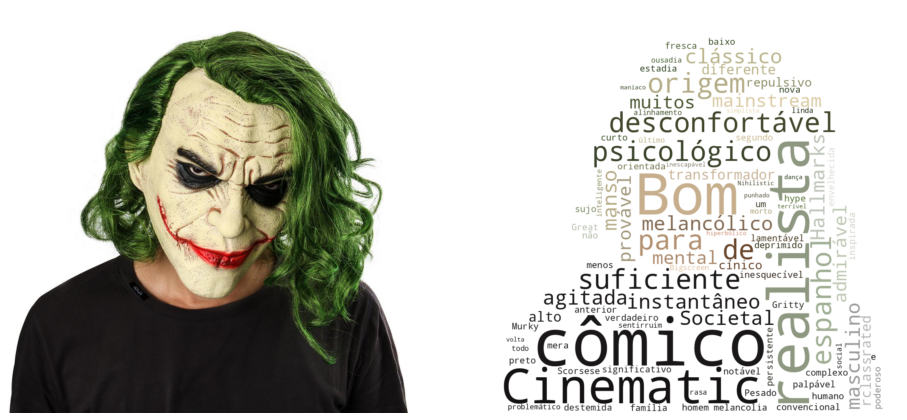

In [21]:
drawWordCloud(adjs_pt, "wc_joker_adjs_pt")

In [22]:
adjs_pt

['«agitada»',
 '«manso»',
 '«instantâneo»',
 '«clássico»',
 '«melancólico»',
 '«masculino»',
 '«Societal»',
 '«Hallmarks»',
 '«mainstream»',
 '«desconfortável»',
 'desconfortável',
 'provável',
 'muitos',
 'realista',
 'mental',
 'admirável',
 'transformador',
 'diferente',
 'alto',
 'rclassrated',
 'de',
 'origem',
 'Bom',
 'Bom',
 'suficiente',
 'realista',
 'repulsivo',
 'cínico',
 'significativo',
 'um',
 'homem',
 'verdadeiro',
 'inesquecível',
 'cinematic',
 'cômico',
 'suficiente',
 'psicológico',
 'humano',
 'espanhol',
 'lamentável',
 'palpável',
 'para',
 'baixo',
 'e',
 'sujo',
 'curto',
 'estadia',
 'preto',
 'deprimido',
 'Gritty',
 'Pesado',
 'anterior',
 'Scorsese',
 'Great',
 'cômico',
 'orientada',
 'para',
 'a',
 'família',
 'destemida',
 'fresca',
 'nova',
 'envelhecida',
 'inspirada',
 'cômico',
 'mera',
 'convencional',
 'cômico',
 'origem',
 'segundo',
 'complexo',
 'espanhol',
 'melancolia',
 'Murky',
 'realista',
 'poderoso',
 'Bom',
 'psicológico',
 'hype',
 'n